# Section A

Q1 Solution 1: &emsp;&emsp;&emsp; Formula:  =[@Returned]*-1<br>
Q1 Solution 2: &emsp;&emsp;&emsp; Drag ‘Store’ in rows. Drag ‘Net Return’ in values. <br>
Q1 Solution 3: &emsp;&emsp;&emsp; Filter the table to keep only ‘NA’ values in Returned col. Replace values in table with 0


Q2 Solution 1: &emsp;&emsp;&emsp; Average skill score per batch

In [2]:
import pandas as pd
data = {
'CandID': ['C1', 'C2', 'C3', 'C4', 'C5'],
'Batch': ['B1', 'B1', 'B2', 'B2', 'B3'],
'DS_Score': [85, None, 78, 88, 90],
'Viz_Score': [80, 75, 82, None, 88],
'SQL_Score': [None, 70, 76, 85, 92]
}
df = pd.DataFrame(data)
df
avg1 = df.groupby('Batch') ['DS_Score'].mean()
avg2 = df.groupby('Batch') ['Viz_Score'].mean()
avg3 = df.groupby('Batch') ['SQL_Score'].mean()
print(avg1)
print(avg2)
print(avg3)
print("\nMean of B1", (avg1 [0]+avg2[0]+avg3[0])/3)
print("Mean of B2", (avg1 [1]+avg2[1]+avg3[1])/3)
print("Mean of B3", (avg1 [2]+avg2[2]+avg3[2])/3)


Batch
B1    85.0
B2    83.0
B3    90.0
Name: DS_Score, dtype: float64
Batch
B1    77.5
B2    82.0
B3    88.0
Name: Viz_Score, dtype: float64
Batch
B1    70.0
B2    80.5
B3    92.0
Name: SQL_Score, dtype: float64

Mean of B1 77.5
Mean of B2 81.83333333333333
Mean of B3 90.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10156\839228853.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nMean of B1", (avg1 [0]+avg2[0]+avg3[0])/3)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10156\839228853.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Mean of B2", (avg1 [1]+avg2[1]+avg3[1])/3)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10156\839228853.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

In [3]:
# create per-candidate average across available scores
df['candidate_mean'] = df[['DS_Score','Viz_Score','SQL_Score']].mean(axis=1, skipna=True)           # optimal solution

# average per batch
batch_avg = df.groupby('Batch')['candidate_mean'].mean()
print(batch_avg)

Batch
B1    77.500000
B2    82.583333
B3    90.000000
Name: candidate_mean, dtype: float64


Q2 Solution 2: &emsp;&emsp;&emsp; CandID with max score

In [ ]:
import pandas as pd
data = {
'CandID': ['C1', 'C2', 'C3', 'C4', 'C5'],
'Batch': ['B1', 'B1', 'B2', 'B2', 'B3'],
'DS_Score': [85, None, 78, 88, 90],
'Viz_Score': [80, 75, 82, None, 88],
'SQL_Score': [None, 70, 76, 85, 92]
}
df = pd.DataFrame(data)
df['Total_score'] = df['DS_Score'].fillna(0)+df['Viz_Score'].fillna(0)+df['SQL_Score'].fillna(0)
df
df['total_score'] = df[['DS_Score','Viz_Score','SQL_Score']].sum(axis=1, skipna=True)                       # optimal solution
top = df.loc[df['total_score'].idxmax(), ['CandID','total_score']]
print(top)

CandID            C5
total_score    270.0
Name: 4, dtype: object


Q2 Solution 3: &emsp;&emsp;&emsp; df['DS_Score'].fillna(df['DS_Score'].mean(), inplace=True)

In [8]:
df[['DS_Score','Viz_Score','SQL_Score']] = df.groupby('Batch')[['DS_Score','Viz_Score','SQL_Score']].transform(lambda x: x.fillna(x.mean()))
df

,CandID,Batch,DS_Score,Viz_Score,SQL_Score,Total_score,total_score
0,C1,B1,85.0,80.0,70.0,165.0,165.0
1,C2,B1,85.0,75.0,70.0,145.0,145.0
2,C3,B2,78.0,82.0,76.0,236.0,236.0
3,C4,B2,88.0,82.0,85.0,173.0,173.0
4,C5,B3,90.0,88.0,92.0,270.0,270.0


Q3 Solution 1: &emsp;&emsp;&emsp; select PurchaseID, BuyerID, net_amount from ( select (Amount-COALESCE(Discount,0) as net_amount from Purchases) as sub where net_amount=Amount-COALESCE(Discount,0)

Q3 Solution 2: &emsp;&emsp;&emsp; total net revenue per BuyerID – 
select BuyerID, SUM(Amount) from Purchases group by BuyerID

Q3 Solution 3: &emsp;&emsp;&emsp; if amount is NULL SQL will automatically treat it as 0 and do the aggregation on valid values. However still, the CASE WHEN THEN can be used to replace nulls with 0

Q4 Solution 1: &emsp;&emsp;&emsp; mean, var & max calculation

In [ ]:
import numpy as np
readings = np.array ([18.0, 19.5, 21.0, 20.5, 19.0, 22.0, 21.5])
print(readings.mean())
print(readings.var())
print(readings.max())

20.214285714285715
1.7755102040816324
22.0


Q4 Solution 2: &emsp;&emsp;&emsp; counting vals greater than 0.5+mean

In [ ]:
import numpy as np
readings = np.array([18.0, 19.5, 21.0, 20.5, 19.0, 22.0, 21.5])
print(readings.mean())
print(readings.var())
print(readings.max())
print(np.size (readings [readings > (readings.mean()+0.5)]))

20.214285714285715
1.7755102040816324
22.0
3


Q4 Solution 3: &emsp;&emsp;&emsp; to exclude outliers, we can filter using below syntax
readings[readings<100]


In [ ]:
import numpy as np
readings = np.array([18.0, 19.5, 21.0, 20.5, 19.0, 22.0, 21.5])
print(readings.mean())
print(readings.var())
print(readings.max())
print(readings [readings < 100])

20.214285714285715
1.7755102040816324
22.0
[18.  19.5 21.  20.5 19.  22.  21.5]


# Section B

Q5 Solution 1: &emsp;&emsp;&emsp; the online channel in North grew from March-> Apr roughly by 3000

![alt text](<Screenshot 2025-09-20 203914.png>)

Q5 Solution 2: &emsp;&emsp;&emsp; DAX :: 
%Change = DIVIDE(GROUPBY(Sheet2,Sheet2[Month],Sheet2[Region]),SUM(Sheet2[Amount]))


Q5 Solution 3: &emsp;&emsp;&emsp; If channel has few rows due to missing values, the last seen value can be pulled through

Q6 Solution 1: &emsp;&emsp;&emsp; Avg satisfaction for churn yes / no

![alt text](<Screenshot 2025-09-20 205021.png>)

Q6 Solution 2: &emsp;&emsp;&emsp; Yes using the below PowerBI ss it seems raising the ticket value has caused more churning

![alt text](<Screenshot 2025-09-20 205210.png>)

Q6 Solution 3: &emsp;&emsp;&emsp; If avg_response_time indicates delay in responding to customer’s query, I think, the churn rate would increase with increase in response time

Q7 Solution 1: &emsp;&emsp;&emsp; average payment per user
select User, AVG(value) as average_payment_per_user from User_Payments group by User


Q7 Solution 2: &emsp;&emsp;&emsp; max single payment
select User, MAX(value) as max_single_payment from User_Payments group by User


Q7 Solution 3: &emsp;&emsp;&emsp; if user’s row is missing it should be ignored as we’re not aware which UID it belongs to, and then mention it explicitly in documentation.

Q8 Solution 1: &emsp;&emsp;&emsp; work hours per Staff

In [ ]:
data = {'Staff': ['S10', '11', 'S12'],
'InTime': ['07:45', '08:30', '09:00'],
'OutTime': ['16:00', '17:30', '18:00']}
df = pd.DataFrame(data)
login = df['InTime']
pd_login = pd.to_datetime(login, format='mixed')
np_login = pd_login.to_numpy()

logout = df['OutTime']
pd_logout = pd.to_datetime(logout, format='mixed')
np_logout = pd_logout.to_numpy()
df['TotalHrsWorked'] = np_logout - np_login
df

,Staff,InTime,OutTime,TotalHrsWorked
0,S10,07:45,16:00,0 days 08:15:00
1,11,08:30,17:30,0 days 09:00:00
2,S12,09:00,18:00,0 days 09:00:00


Q8 Solution 2: &emsp;&emsp;&emsp; staff ID S11 & S12 worked the longest by 45mins as of S10

Q8 Solution 3: &emsp;&emsp;&emsp; 

Q9 Solution 1: &emsp;&emsp;&emsp; Excel: =[@Clicks]/[@Impr]

In [ ]:
campreach_df = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Documents\Tests\test.xlsx", sheet_name="T2Q9")          # installed dependency pip3 install openpyxl
campreach_df.drop('CTR', axis=1, inplace=True)

campreach_df['CTR_pandas'] = campreach_df['Clicks']/campreach_df['Impr']
campreach_df


,Date,Campaign,Impr,Clicks,CTR_pandas
0,2025-04-01,CmpA,8000,320,0.040000
1,2025-04-01,CmpB,4500,180,0.040000
2,2025-04-02,CmpA,8200,330,0.040244


Q9 Solution 2: &emsp;&emsp;&emsp; Line chart. there doesn't seem a need for aggregation

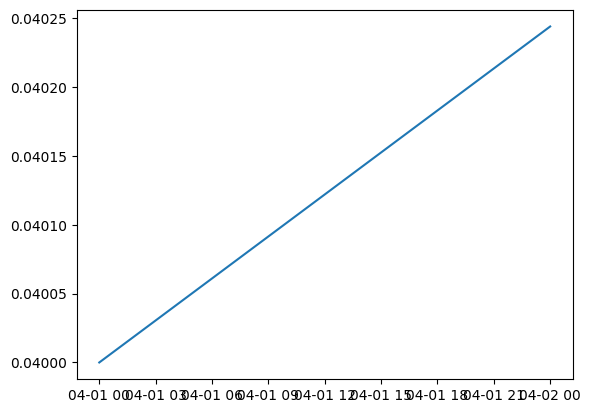

In [ ]:
import matplotlib.pyplot as plt
ctr_vals = campreach_df['CTR_pandas'].to_numpy()                # extracted values from col of a dataframe into a var
dt_vals = campreach_df['Date'].to_numpy()

plt.plot(dt_vals, ctr_vals)
plt.show()

Q9 Solution 3: &emsp;&emsp;&emsp; For outlier/0 values in impressions, we can group by Campaign and impute with the average value 

In [ ]:
campreach_df.loc[campreach_df.Impr > 10000, 'Impr'] = campreach_df.groupby('Campaign')['Impr'].mean()

# Section C

Q10 Solution 1: &emsp;&emsp;&emsp; Profit = MonthlyRev - FixedCost

In [ ]:
branchStats = pd.read_excel(r'C:\Users\Lenovo\OneDrive\Documents\Tests\test.xlsx',sheet_name="T2Q9A")
print(branchStats)

branchStats['Profit'] = branchStats['MonthlyRev'] - branchStats['FixedCost']
print(branchStats)

  Branch   Metro  MonthlyRev  FixedCost  Visitors
0    BR1  MetroA      400000     320000     20000
1    BR2  MetroB      250000     150000      9000
2    BR3  MetroC      160000      90000      4500
  Branch   Metro  MonthlyRev  FixedCost  Visitors  Profit
0    BR1  MetroA      400000     320000     20000   80000
1    BR2  MetroB      250000     150000      9000  100000
2    BR3  MetroC      160000      90000      4500   70000


Q10 Solution 2: &emsp;&emsp;&emsp; KPIs

In [ ]:
metroInfo = pd.read_excel(r'C:\Users\Lenovo\OneDrive\Documents\Tests\test.xlsx',sheet_name="T2Q9B")
print(metroInfo)

    Metro   Pop  AvgSpending  Connectivitylndex
0  MetroA    6M        60000                  9
1  MetroB    4M        45000                  7
2  MetroC  1.5M        28000                  5


In [ ]:
entdata = pd.merge(branchStats, metroInfo, on="Metro", how="right")                         # joining 2 tables
entdata

,Branch,Metro,MonthlyRev,FixedCost,Visitors,Profit,Pop,AvgSpending,Connectivitylndex
0,BR1,MetroA,400000,320000,20000,80000,6M,60000,9
1,BR2,MetroB,250000,150000,9000,100000,4M,45000,7
2,BR3,MetroC,160000,90000,4500,70000,1.5M,28000,5


In [ ]:
# for Metro A
revA = entdata.loc[entdata.Metro=="MetroA", 'MonthlyRev']
revB = entdata.loc[entdata.Metro=="MetroB", 'MonthlyRev']
print(revA, revB)

0    400000
Name: MonthlyRev, dtype: int64 1    250000
Name: MonthlyRev, dtype: int64
